# 탐색적 데이터 분석

In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd

In [2]:
df = pd.read_csv('4. BIGDATA/TOTAL_DATA.csv', encoding='cp949"')
df

,팀명,G,E,PKO,PO,A,DP,FPCT,PB,SB,...,IBB.1,WP,BK,SBA,SB.1,CS.1,SB%,OOB,PKO.1,W
0,HT,133,107,1,3536,1477,134,0.979,10,100,...,17,51,3,155,92,63,59.4,0,0,60
1,LG,133,103,12,3554,1485,129,0.980,16,110,...,43,52,6,154,96,58,62.3,0,0,58
2,SK,133,96,3,3514,1434,124,0.981,19,106,...,31,54,1,182,123,59,67.6,0,0,60
3,OB,133,109,3,3541,1599,140,0.979,12,126,...,17,47,0,166,132,34,79.5,0,0,65
4,LT,133,99,9,3515,1518,141,0.981,12,85,...,23,53,2,159,106,53,66.7,0,0,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,OB,93,59,5,2493,840,87,0.983,4,59,...,15,37,4,84,59,25,70.2,37,1,52
170,LT,88,46,1,2353,898,86,0.986,4,62,...,11,46,2,86,65,21,75.6,33,2,45
171,SS,93,68,4,2448,864,91,0.980,2,37,...,9,33,2,124,87,37,70.2,32,9,42
172,WO,96,71,12,2562,1018,96,0.981,6,59,...,6,32,7,96,81,15,84.4,28,7,58


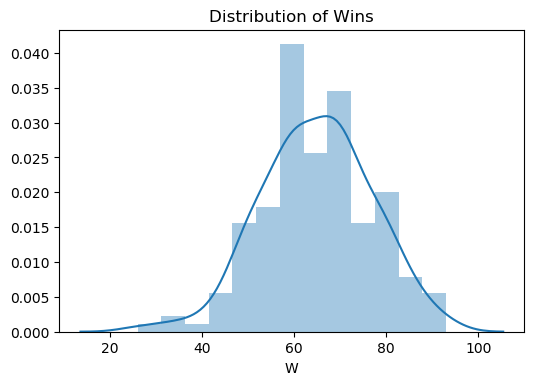

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(dpi=100)
plt.xlabel('Wins')
plt.title('Distribution of Wins')
sns.distplot(df['W'], norm_hist=True)
plt.show()

In [4]:
corr_list = list(df.corr()['W'])
col_list = list(df.columns)[1:]

print("[상관계수 with 'W']")
for i in range(len(col_list)):
    print(col_list[i]+':', corr_list[i])

[상관계수 with 'W']
G: 0.4912138918116086
E: 0.07398971477635438
PKO: 0.03647726872741382
PO: 0.5337075528142012
A: 0.33550076688125485
DP: 0.18998428453214763
FPCT: 0.2508841174672635
PB: -0.14900144380086164
SB: -0.11541437706608959
CS: 0.13165146983832832
CS%: 0.22217846809416922
AVG: 0.5200311348065394
G.1: 0.49238153343686836
PA: 0.567312688093285
AB: 0.5174784128059238
R: 0.6975613053388748
H: 0.6097900732966745
2B: 0.5117195971802011
3B: 0.27860984169190367
HR: 0.48114056613589007
TB: 0.6161684565280963
RBI: 0.688849812540574
SAC: 0.06727067184538447
SF: 0.4672062480120319
BB: 0.537134888092437
IBB: 0.2980170783248593
HBP: 0.4875646888166633
SO: 0.20618542750049218
GDP: 0.29687822352283516
SLG: 0.4990723277290679
OBP: 0.5743398670944203
OPS: 0.5504762673176733
MH: 0.4918930146009818
RISP: 0.4688683949526122
PH-BA: 0.15658469781826825
ERA: -0.3997490597917352
L: -0.5065720433730003
SV: 0.6885675049750097
HLD: 0.3857579737536936
WPCT: 0.8619682891127843
IP: 0.5355434401801716
H.1: 0.2

C:\Users\nakhe\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54016 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\nakhe\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47749 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\nakhe\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 54016 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\nakhe\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 47749 missing from current font.
  font.set_text(s, 0, flags=flags)


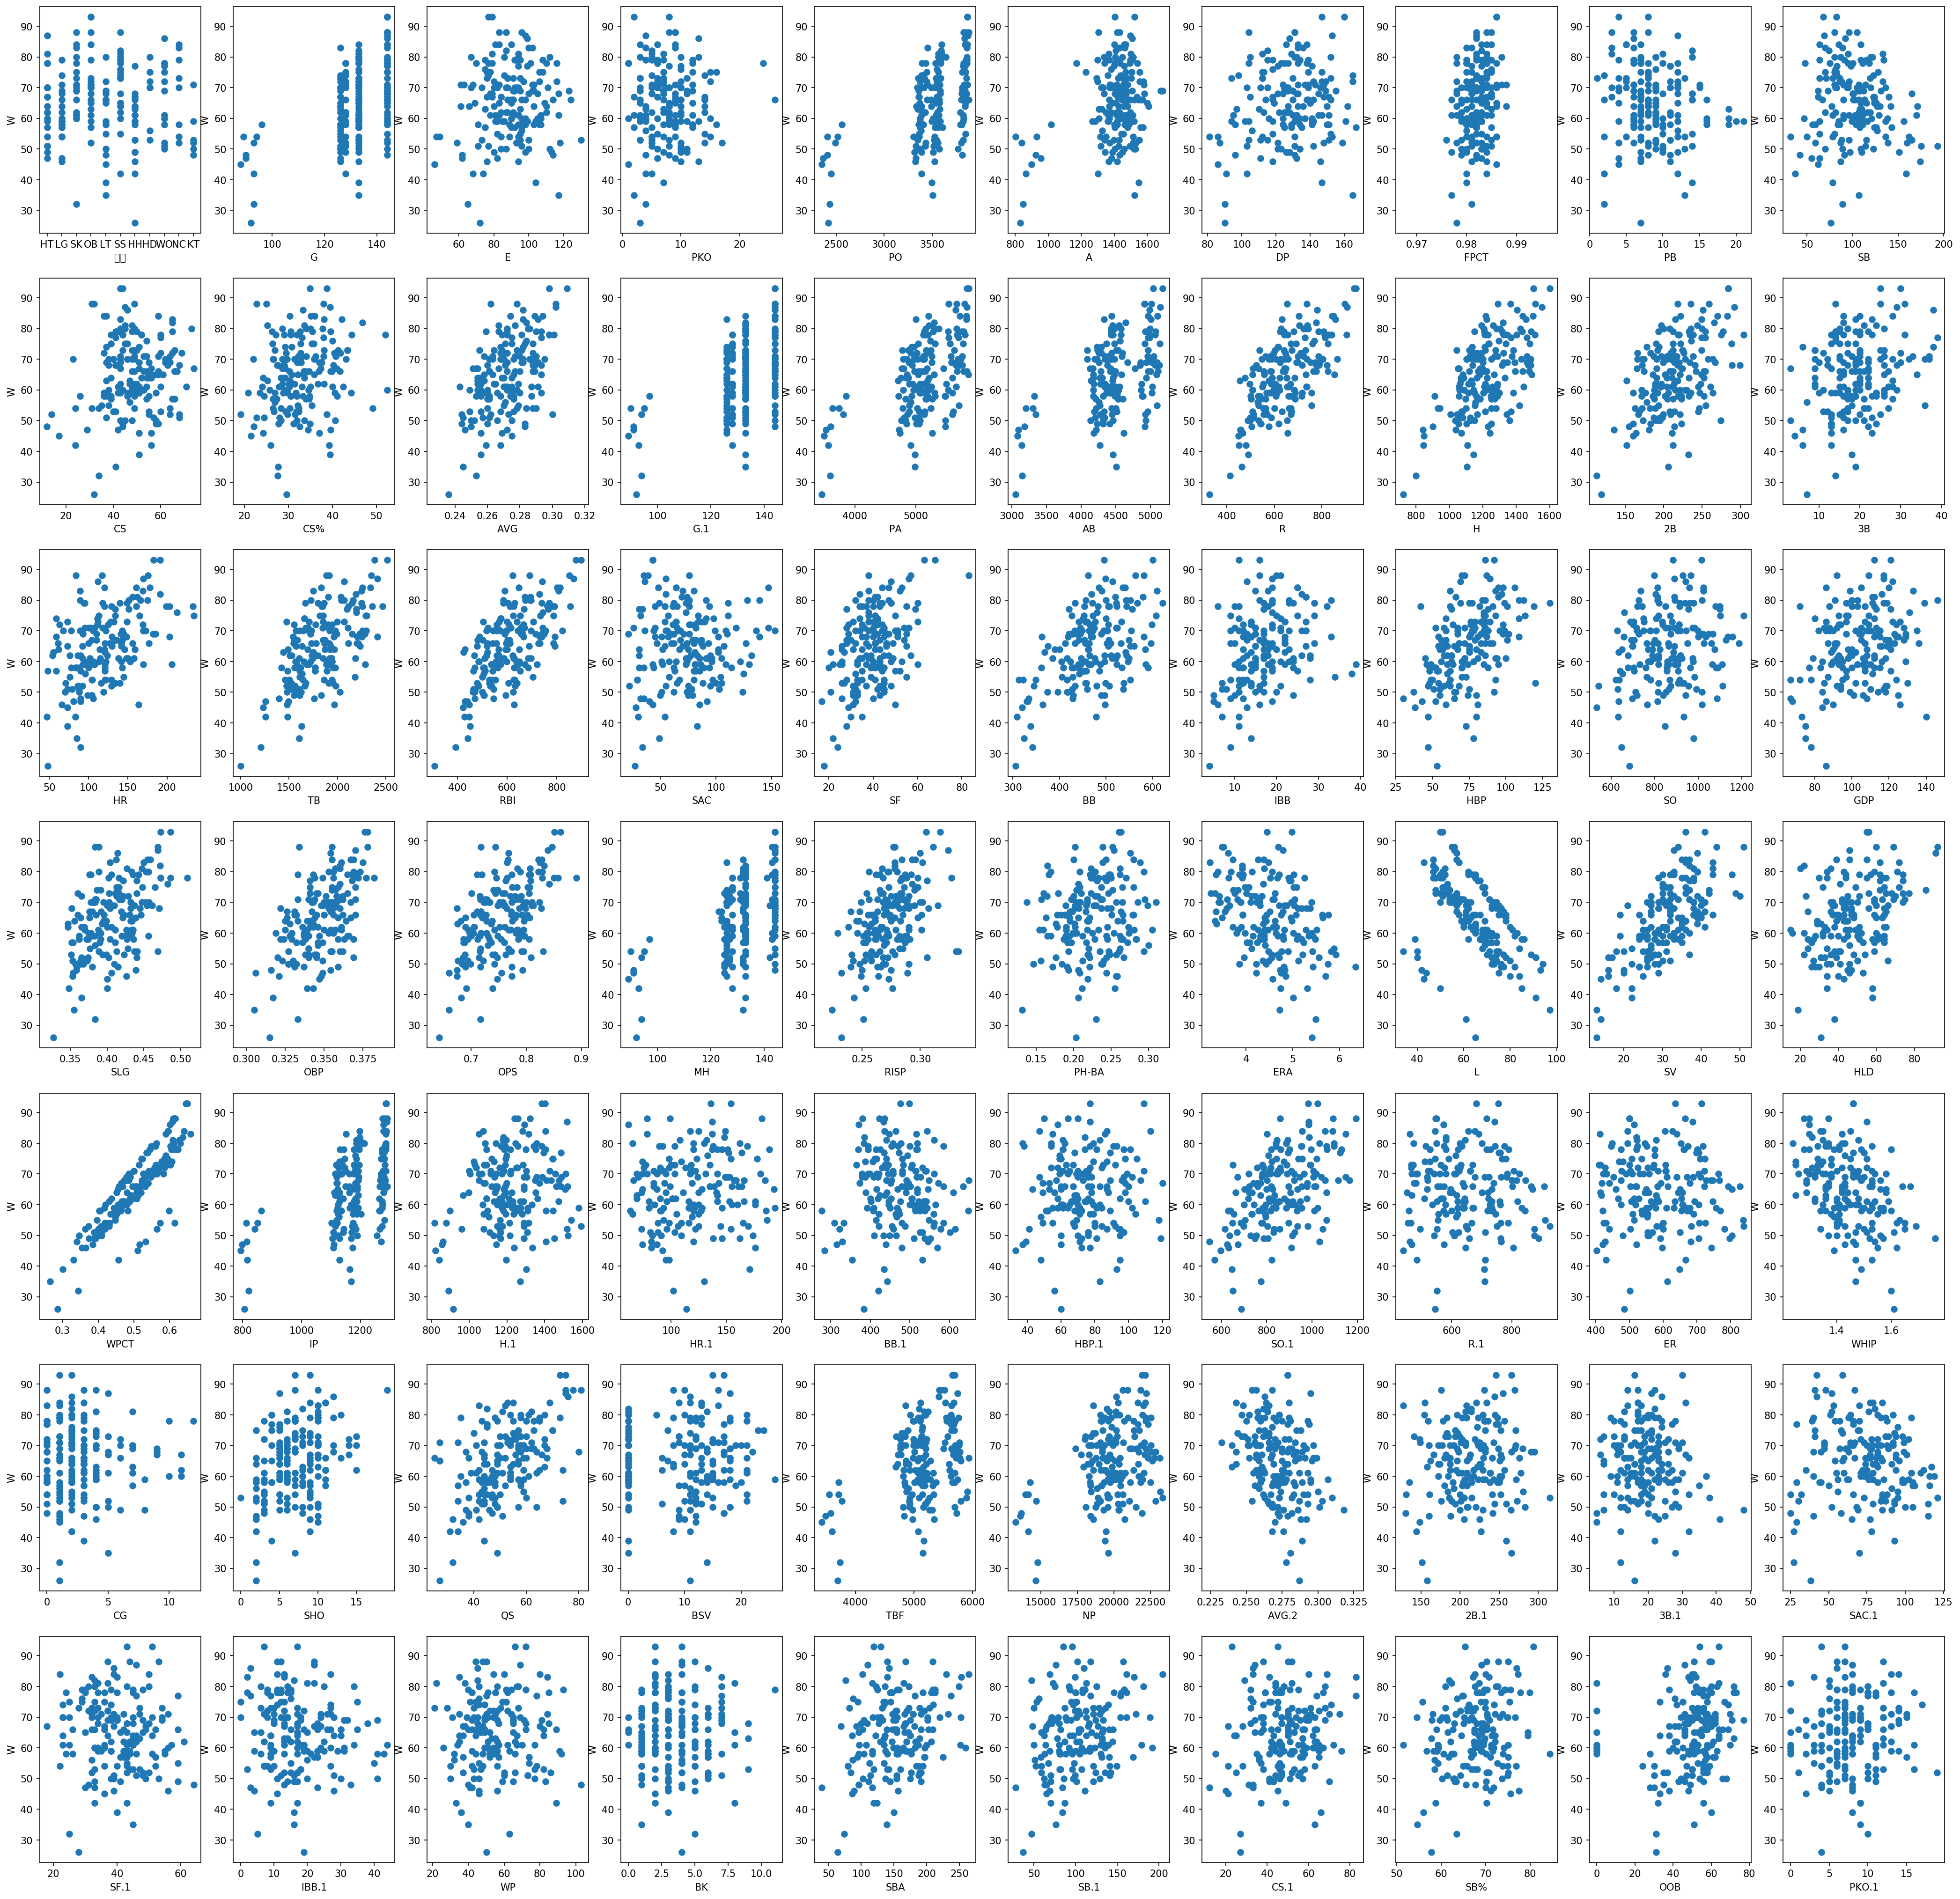

In [5]:
count=1
plt.figure(figsize=(35,35), dpi=150)
for item in list(df.columns):
    if item!='W':
        plt.subplot(7, 10, count)
        plt.xlabel(item)
        plt.ylabel('W')
        plt.scatter(df[item], df['W'])
    count += 1

# Drop 요소 선택

In [6]:
drop_list = ['팀명', 'G', 'PKO', 'PB', 'G.1', 'SAC', 'SO', 'GDP', 'PH-BA', 'MH', 'IP', 'H.1', 'HR.1', 'BB.1', 'HBP.1', 'R.1', 'ER', 'SAC.1', '3B.1', '2B.1', 'BSV', 'IBB.1', 'WP', 'PKO.1']
df = df.drop(drop_list, axis=1)

df.head()

,E,PO,A,DP,FPCT,SB,CS,CS%,AVG,PA,...,NP,AVG.2,SF.1,BK,SBA,SB.1,CS.1,SB%,OOB,W
0,107,3536,1477,134,0.979,100,53,34.6,0.278,5189,...,19799,0.272,36,3,155,92,63,59.4,0,60
1,103,3554,1485,129,0.980,110,55,33.3,0.276,5319,...,21119,0.277,46,6,154,96,58,62.3,0,58
2,96,3514,1434,124,0.981,106,44,29.3,0.260,5077,...,19710,0.259,34,1,182,123,59,67.6,0,60
3,109,3541,1599,140,0.979,126,56,30.8,0.276,5303,...,20071,0.284,48,0,166,132,34,79.5,0,65
4,99,3515,1518,141,0.981,85,58,40.6,0.280,5308,...,19593,0.276,38,2,159,106,53,66.7,0,59


# Data Split

In [7]:
x_data = df.values[:, 0:len(df.columns)-1]
x_data

array([[ 107. , 3536. , 1477. , ...,   63. ,   59.4,    0. ],
       [ 103. , 3554. , 1485. , ...,   58. ,   62.3,    0. ],
       [  96. , 3514. , 1434. , ...,   59. ,   67.6,    0. ],
       ...,
       [  68. , 2448. ,  864. , ...,   37. ,   70.2,   32. ],
       [  71. , 2562. , 1018. , ...,   15. ,   84.4,   28. ],
       [  72. , 2419. ,  830. , ...,   27. ,   57.8,   31. ]])

In [8]:
y_data = df.values[:, [len(df.columns)-1]]
y_data

array([[60.],
       [58.],
       [60.],
       [65.],
       [59.],
       [81.],
       [61.],
       [72.],
       [78.],
       [66.],
       [61.],
       [66.],
       [35.],
       [82.],
       [59.],
       [70.],
       [78.],
       [60.],
       [66.],
       [57.],
       [39.],
       [76.],
       [63.],
       [80.],
       [67.],
       [59.],
       [61.],
       [70.],
       [50.],
       [73.],
       [53.],
       [75.],
       [49.],
       [54.],
       [70.],
       [72.],
       [58.],
       [74.],
       [64.],
       [53.],
       [64.],
       [47.],
       [60.],
       [63.],
       [50.],
       [73.],
       [67.],
       [70.],
       [51.],
       [58.],
       [73.],
       [70.],
       [55.],
       [62.],
       [67.],
       [56.],
       [57.],
       [46.],
       [83.],
       [70.],
       [69.],
       [65.],
       [50.],
       [64.],
       [81.],
       [54.],
       [80.],
       [71.],
       [66.],
       [64.],
       [46.],
      

# Scaling

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [10]:
x_data = scaler.fit_transform(x_data)

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, shuffle=True)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((147, 46), (147, 1), (27, 46), (27, 1))

# Make DNN

In [12]:
%%time

model = keras.models.Sequential()
model.add(keras.layers.Dense(256, activation='relu', input_shape=(len(df.columns)-1,)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(1))
model.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])

hist = model.fit(X_train, y_train, epochs=100, batch_size=1, validation_data=(X_test, y_test), shuffle=True)

Train on 147 samples, validate on 27 samples
Epoch 1/100
147/147 [==============================] - 2s 15ms/sample - loss: 1685.2114 - mae: 33.8069 - val_loss: 300.5876 - val_mae: 14.5001
Epoch 2/100
147/147 [==============================] - 1s 5ms/sample - loss: 199.0667 - mae: 10.7958 - val_loss: 182.0814 - val_mae: 11.5610
Epoch 3/100
147/147 [==============================] - 1s 5ms/sample - loss: 124.7618 - mae: 8.9590 - val_loss: 150.0787 - val_mae: 9.7529
Epoch 4/100
147/147 [==============================] - 1s 4ms/sample - loss: 93.2879 - mae: 7.6743 - val_loss: 135.2963 - val_mae: 9.0191
Epoch 5/100
147/147 [==============================] - 1s 4ms/sample - loss: 72.6431 - mae: 6.6227 - val_loss: 84.9748 - val_mae: 7.6357
Epoch 6/100
147/147 [==============================] - 1s 5ms/sample - loss: 58.5858 - mae: 6.1737 - val_loss: 112.7245 - val_mae: 8.8329
Epoch 7/100
147/147 [==============================] - 1s 4ms/sample - loss: 48.5188 - mae: 5.5028 - val_loss: 133.2620

147/147 [==============================] - 1s 4ms/sample - loss: 7.0927 - mae: 2.0433 - val_loss: 67.2635 - val_mae: 6.8544
Epoch 61/100
147/147 [==============================] - 1s 4ms/sample - loss: 9.6107 - mae: 2.4992 - val_loss: 70.7059 - val_mae: 7.2850
Epoch 62/100
147/147 [==============================] - 1s 4ms/sample - loss: 8.9423 - mae: 2.2841 - val_loss: 64.5038 - val_mae: 6.6712
Epoch 63/100
147/147 [==============================] - 1s 4ms/sample - loss: 8.5467 - mae: 2.2059 - val_loss: 56.6901 - val_mae: 6.1280
Epoch 64/100
147/147 [==============================] - 1s 4ms/sample - loss: 8.9255 - mae: 2.2153 - val_loss: 59.8992 - val_mae: 6.3467
Epoch 65/100
147/147 [==============================] - 1s 4ms/sample - loss: 8.8274 - mae: 2.1455 - val_loss: 50.4367 - val_mae: 6.1219
Epoch 66/100
147/147 [==============================] - 1s 4ms/sample - loss: 9.2861 - mae: 2.3144 - val_loss: 75.5249 - val_mae: 6.8919
Epoch 67/100
147/147 [==============================] 

# 하이퍼파라미터 튜닝

In [13]:
import numpy as np

In [14]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [18]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[len(df.columns)-1]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer, metrics=['mae'])
    return model

In [19]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [20]:
%%time
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_test, y_test),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Train on 147 samples, validate on 27 samples
Epoch 1/100
147/147 [==============================] - 1s 6ms/sample - loss: 3247.6054 - mae: 55.1050 - val_loss: 810.4675 - val_mae: 24.1592
Epoch 2/100
147/147 [==============================] - 0s 210us/sample - loss: 651.1797 - mae: 21.4947 - val_loss: 609.5273 - val_mae: 21.2550
Epoch 3/100
147/147 [==============================] - 0s 227us/sample - loss: 425.0044 - mae: 16.4589 - val_loss: 257.3906 - val_mae: 13.3419
Epoch 4/100
147/147 [==============================] - 0s 217us/sample - loss: 214.0076 - mae: 11.9919 - val_loss: 215.0656 - val_mae: 11.9147
Epoch 5/100
147/147 [==============================] - 0s 206us/sample - loss: 130.3558 - mae: 9.0892 - val_loss: 132.5457 - val_mae: 9.5559
Epoch 6/100
147/147 [==============================] - 0s 214us/sample - loss: 93.2087 - mae: 7.8003 - val_loss: 147.4251 - val_mae: 10.4540
Epoch 7/100
147/147 [==============================] - 0s 204us/sample - loss: 76.8512 - mae: 7.1053 -

In [21]:
mse_test = keras_reg.score(X_test, y_test)

27/27 [==============================] - 0s 9ms/sample - loss: 48.7092 - mae: 5.5705


In [22]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_test, y_test),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] learning_rate=0.001683454924600351, n_hidden=0, n_neurons=15 ....


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Train on 98 samples, validate on 27 samples
Epoch 1/100
98/98 [==============================] - 0s 5ms/sample - loss: 4312.7529 - mae: 64.6448 - val_loss: 4082.6997 - val_mae: 62.9130
Epoch 2/100
98/98 [==============================] - 0s 304us/sample - loss: 4154.2719 - mae: 63.6067 - val_loss: 4030.3369 - val_mae: 62.8352
Epoch 3/100
98/98 [==============================] - 0s 275us/sample - loss: 3976.5408 - mae: 62.5326 - val_loss: 3995.8640 - val_mae: 62.6850
Epoch 4/100
98/98 [==============================] - 0s 285us/sample - loss: 3838.2496 - mae: 61.5035 - val_loss: 3926.7339 - val_mae: 62.0268
Epoch 5/100
98/98 [==============================] - 0s 295us/sample - loss: 3729.2425 - mae: 60.5458 - val_loss: 3823.0828 - val_mae: 61.2650
Epoch 6/100
98/98 [==============================] - 0s 305us/sample - loss: 3624.7136 - mae: 59.7359 - val_loss: 3747.7637 - val_mae: 60.5976
Epoch 7/100
98/98 [==============================] - 0s 356us/sample - loss: 3533.3824 - mae: 58.957

Epoch 58/100
98/98 [==============================] - 0s 315us/sample - loss: 869.8842 - mae: 28.2927 - val_loss: 1362.9924 - val_mae: 35.6072
Epoch 59/100
98/98 [==============================] - 0s 305us/sample - loss: 846.5464 - mae: 27.9143 - val_loss: 1343.4271 - val_mae: 35.3012
Epoch 60/100
98/98 [==============================] - 0s 305us/sample - loss: 829.3690 - mae: 27.5578 - val_loss: 1315.8917 - val_mae: 34.9740
Epoch 61/100
98/98 [==============================] - 0s 295us/sample - loss: 802.4894 - mae: 27.1550 - val_loss: 1258.9143 - val_mae: 34.4442
Epoch 62/100
98/98 [==============================] - 0s 275us/sample - loss: 772.8181 - mae: 26.8810 - val_loss: 1245.3977 - val_mae: 34.1518
Epoch 63/100
98/98 [==============================] - 0s 315us/sample - loss: 755.7551 - mae: 26.4580 - val_loss: 1235.6650 - val_mae: 33.9532
Epoch 64/100
98/98 [==============================] - 0s 285us/sample - loss: 740.4017 - mae: 26.1041 - val_loss: 1185.4049 - val_mae: 33.3278

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.2s remaining:    0.0s


98/98 [==============================] - 1s 5ms/sample - loss: 4445.6967 - mae: 65.5466 - val_loss: 4085.9004 - val_mae: 62.9329
Epoch 2/100
98/98 [==============================] - 0s 285us/sample - loss: 4279.3868 - mae: 64.5431 - val_loss: 4018.8579 - val_mae: 62.8498
Epoch 3/100
98/98 [==============================] - 0s 336us/sample - loss: 4090.3387 - mae: 63.5086 - val_loss: 3969.1384 - val_mae: 62.6858
Epoch 4/100
98/98 [==============================] - 0s 377us/sample - loss: 3946.6439 - mae: 62.5349 - val_loss: 3850.2771 - val_mae: 61.8315
Epoch 5/100
98/98 [==============================] - 0s 448us/sample - loss: 3809.3224 - mae: 61.5044 - val_loss: 3752.0144 - val_mae: 60.9535
Epoch 6/100
98/98 [==============================] - 0s 366us/sample - loss: 3678.9051 - mae: 60.4197 - val_loss: 3694.7834 - val_mae: 60.5911
Epoch 7/100
98/98 [==============================] - 0s 397us/sample - loss: 3561.1504 - mae: 59.4885 - val_loss: 3626.3623 - val_mae: 59.9220
Epoch 8/100
9

98/98 [==============================] - 0s 570us/sample - loss: 895.3664 - mae: 28.7410 - val_loss: 1208.4490 - val_mae: 33.8074
Epoch 59/100
98/98 [==============================] - 0s 356us/sample - loss: 868.7300 - mae: 28.3938 - val_loss: 1178.5988 - val_mae: 33.4812
Epoch 60/100
98/98 [==============================] - 0s 305us/sample - loss: 847.2732 - mae: 28.0811 - val_loss: 1158.6632 - val_mae: 33.1711
Epoch 61/100
98/98 [==============================] - 0s 295us/sample - loss: 826.6658 - mae: 27.6960 - val_loss: 1138.4999 - val_mae: 32.7703
Epoch 62/100
98/98 [==============================] - 0s 285us/sample - loss: 805.6684 - mae: 27.2468 - val_loss: 1105.3638 - val_mae: 32.3813
Epoch 63/100
98/98 [==============================] - 0s 285us/sample - loss: 785.0796 - mae: 26.9495 - val_loss: 1083.9590 - val_mae: 32.0934
Epoch 64/100
98/98 [==============================] - 0s 295us/sample - loss: 766.3619 - mae: 26.6289 - val_loss: 1058.7119 - val_mae: 31.6310
Epoch 65/100

98/98 [==============================] - 0s 336us/sample - loss: 2993.4707 - mae: 54.1322 - val_loss: 3060.1650 - val_mae: 54.6205
Epoch 14/100
98/98 [==============================] - 0s 336us/sample - loss: 2923.5733 - mae: 53.4201 - val_loss: 2976.3936 - val_mae: 53.8777
Epoch 15/100
98/98 [==============================] - 0s 326us/sample - loss: 2833.1420 - mae: 52.5531 - val_loss: 2894.9849 - val_mae: 53.0915
Epoch 16/100
98/98 [==============================] - 0s 295us/sample - loss: 2758.2137 - mae: 51.8067 - val_loss: 2796.3337 - val_mae: 52.3795
Epoch 17/100
98/98 [==============================] - 0s 295us/sample - loss: 2667.3611 - mae: 51.1757 - val_loss: 2730.6504 - val_mae: 51.7977
Epoch 18/100
98/98 [==============================] - 0s 305us/sample - loss: 2598.3495 - mae: 50.5074 - val_loss: 2720.7998 - val_mae: 51.3451
Epoch 19/100
98/98 [==============================] - 0s 346us/sample - loss: 2537.5564 - mae: 49.6078 - val_loss: 2717.8748 - val_mae: 50.9869
Epoch

98/98 [==============================] - 0s 336us/sample - loss: 648.0945 - mae: 24.6746 - val_loss: 730.7217 - val_mae: 25.9974
Epoch 71/100
98/98 [==============================] - 0s 326us/sample - loss: 626.9214 - mae: 24.1986 - val_loss: 712.7477 - val_mae: 25.7410
Epoch 72/100
98/98 [==============================] - 0s 346us/sample - loss: 611.3981 - mae: 23.9642 - val_loss: 715.9495 - val_mae: 25.6279
Epoch 73/100
98/98 [==============================] - 0s 336us/sample - loss: 595.4406 - mae: 23.5088 - val_loss: 680.9532 - val_mae: 25.1034
Epoch 74/100
98/98 [==============================] - 0s 326us/sample - loss: 579.3584 - mae: 23.2884 - val_loss: 660.2561 - val_mae: 24.7540
Epoch 75/100
98/98 [==============================] - 0s 519us/sample - loss: 564.2617 - mae: 22.9868 - val_loss: 642.9915 - val_mae: 24.4210
Epoch 76/100
98/98 [==============================] - 0s 346us/sample - loss: 552.7617 - mae: 22.7279 - val_loss: 628.8582 - val_mae: 24.0881
Epoch 77/100
98/98 

Epoch 26/100
98/98 [==============================] - 0s 295us/sample - loss: 168.5620 - mae: 11.1764 - val_loss: 368.9791 - val_mae: 17.6724
Epoch 27/100
98/98 [==============================] - 0s 341us/sample - loss: 147.3535 - mae: 10.5484 - val_loss: 349.2030 - val_mae: 17.1589
Epoch 28/100
98/98 [==============================] - 0s 285us/sample - loss: 130.6078 - mae: 9.8205 - val_loss: 333.9363 - val_mae: 16.6213
Epoch 29/100
98/98 [==============================] - 0s 295us/sample - loss: 119.0397 - mae: 9.3363 - val_loss: 326.1514 - val_mae: 16.4307
Epoch 30/100
98/98 [==============================] - 0s 295us/sample - loss: 113.7095 - mae: 8.9185 - val_loss: 304.4331 - val_mae: 15.8076
Epoch 31/100
98/98 [==============================] - 0s 295us/sample - loss: 102.6325 - mae: 8.3858 - val_loss: 274.9412 - val_mae: 14.9647
Epoch 32/100
98/98 [==============================] - 0s 295us/sample - loss: 90.6310 - mae: 7.9219 - val_loss: 240.3841 - val_mae: 13.8994
Epoch 33/100

98/98 [==============================] - 0s 326us/sample - loss: 7.4998 - mae: 2.1932 - val_loss: 29.7515 - val_mae: 4.3855
Epoch 86/100
98/98 [==============================] - 0s 336us/sample - loss: 9.2575 - mae: 2.4695 - val_loss: 25.2248 - val_mae: 4.1590
Epoch 87/100
98/98 [==============================] - 0s 315us/sample - loss: 7.4075 - mae: 2.1787 - val_loss: 22.9016 - val_mae: 3.9148
Epoch 88/100
98/98 [==============================] - 0s 305us/sample - loss: 6.8498 - mae: 2.1033 - val_loss: 21.4119 - val_mae: 3.8018
Epoch 89/100
98/98 [==============================] - 0s 294us/sample - loss: 6.7192 - mae: 2.0541 - val_loss: 21.1285 - val_mae: 3.7717
Epoch 90/100
98/98 [==============================] - 0s 295us/sample - loss: 6.4960 - mae: 2.0208 - val_loss: 20.5255 - val_mae: 3.6406
Epoch 91/100
98/98 [==============================] - 0s 275us/sample - loss: 6.3039 - mae: 1.9997 - val_loss: 19.7037 - val_mae: 3.5844
Epoch 92/100
98/98 [==============================] - 

98/98 [==============================] - 0s 315us/sample - loss: 36.9778 - mae: 4.9733 - val_loss: 78.3839 - val_mae: 7.6371
Epoch 42/100
98/98 [==============================] - 0s 336us/sample - loss: 34.1286 - mae: 4.7821 - val_loss: 71.1397 - val_mae: 7.2966
Epoch 43/100
98/98 [==============================] - 0s 315us/sample - loss: 30.9677 - mae: 4.5881 - val_loss: 65.8153 - val_mae: 7.0334
Epoch 44/100
98/98 [==============================] - 0s 356us/sample - loss: 28.2316 - mae: 4.4046 - val_loss: 61.9234 - val_mae: 6.9466
Epoch 45/100
98/98 [==============================] - 0s 315us/sample - loss: 27.4942 - mae: 4.3795 - val_loss: 57.0238 - val_mae: 6.2840
Epoch 46/100
98/98 [==============================] - 0s 305us/sample - loss: 24.2897 - mae: 4.1031 - val_loss: 52.5223 - val_mae: 5.9303
Epoch 47/100
98/98 [==============================] - 0s 305us/sample - loss: 22.5512 - mae: 3.9240 - val_loss: 47.8229 - val_mae: 5.7488
Epoch 48/100
98/98 [===========================

49/49 [==============================] - 0s 182us/sample - loss: 7.5989 - mae: 2.2428
[CV]  learning_rate=0.008731907739399206, n_hidden=0, n_neurons=21, total=   4.3s
[CV] learning_rate=0.008731907739399206, n_hidden=0, n_neurons=21 ....
Train on 98 samples, validate on 27 samples
Epoch 1/100
98/98 [==============================] - 0s 5ms/sample - loss: 4196.8411 - mae: 63.9668 - val_loss: 3636.3921 - val_mae: 58.8288
Epoch 2/100
98/98 [==============================] - 0s 315us/sample - loss: 3621.1645 - mae: 59.1747 - val_loss: 3696.2878 - val_mae: 57.4104
Epoch 3/100
98/98 [==============================] - 0s 336us/sample - loss: 3186.7857 - mae: 53.4970 - val_loss: 2957.3093 - val_mae: 53.6364
Epoch 4/100
98/98 [==============================] - 0s 298us/sample - loss: 2680.3554 - mae: 51.0197 - val_loss: 2566.6072 - val_mae: 50.0040
Epoch 5/100
98/98 [==============================] - 0s 275us/sample - loss: 2322.6538 - mae: 47.3836 - val_loss: 2146.0361 - val_mae: 45.5877
Epoc

98/98 [==============================] - 0s 336us/sample - loss: 11.0334 - mae: 2.6301 - val_loss: 20.1196 - val_mae: 3.5635
Epoch 58/100
98/98 [==============================] - 0s 336us/sample - loss: 11.4571 - mae: 2.6609 - val_loss: 19.9473 - val_mae: 3.5622
Epoch 59/100
98/98 [==============================] - 0s 295us/sample - loss: 10.4997 - mae: 2.5613 - val_loss: 19.2576 - val_mae: 3.4871
Epoch 60/100
98/98 [==============================] - 0s 336us/sample - loss: 9.9564 - mae: 2.5263 - val_loss: 18.9111 - val_mae: 3.4603
Epoch 61/100
98/98 [==============================] - 0s 305us/sample - loss: 9.8568 - mae: 2.4906 - val_loss: 16.0217 - val_mae: 3.1918
Epoch 62/100
98/98 [==============================] - 0s 305us/sample - loss: 8.7771 - mae: 2.4226 - val_loss: 13.9882 - val_mae: 3.0012
Epoch 63/100
98/98 [==============================] - 0s 315us/sample - loss: 8.2903 - mae: 2.3672 - val_loss: 14.3373 - val_mae: 2.9984
Epoch 64/100
98/98 [==============================]

98/98 [==============================] - 0s 315us/sample - loss: 97.5031 - mae: 7.1905 - val_loss: 105.7120 - val_mae: 8.4204
Epoch 17/100
98/98 [==============================] - 0s 316us/sample - loss: 35.8022 - mae: 4.5370 - val_loss: 166.4014 - val_mae: 9.6434
Epoch 18/100
98/98 [==============================] - 0s 310us/sample - loss: 51.1340 - mae: 5.4781 - val_loss: 83.0380 - val_mae: 7.0038
Epoch 19/100
98/98 [==============================] - 0s 296us/sample - loss: 27.2290 - mae: 4.0551 - val_loss: 121.7022 - val_mae: 9.0775
Epoch 20/100
98/98 [==============================] - 0s 316us/sample - loss: 30.8164 - mae: 4.3019 - val_loss: 94.1476 - val_mae: 7.6485
Epoch 21/100
98/98 [==============================] - 0s 335us/sample - loss: 24.6037 - mae: 3.9129 - val_loss: 212.7865 - val_mae: 11.8285
Epoch 22/100
98/98 [==============================] - 0s 336us/sample - loss: 50.5749 - mae: 5.2922 - val_loss: 87.1924 - val_mae: 7.7119
Epoch 23/100
98/98 [======================

98/98 [==============================] - 0s 340us/sample - loss: 76.3554 - mae: 6.9252 - val_loss: 240.5837 - val_mae: 13.2418
Epoch 12/100
98/98 [==============================] - 0s 315us/sample - loss: 105.9883 - mae: 8.2471 - val_loss: 143.5263 - val_mae: 9.9440
Epoch 13/100
98/98 [==============================] - 0s 315us/sample - loss: 58.5736 - mae: 5.9055 - val_loss: 138.4729 - val_mae: 9.5088
Epoch 14/100
98/98 [==============================] - 0s 336us/sample - loss: 67.1835 - mae: 6.4921 - val_loss: 192.8166 - val_mae: 12.1709
Epoch 15/100
98/98 [==============================] - 0s 326us/sample - loss: 63.3506 - mae: 6.3405 - val_loss: 138.9754 - val_mae: 10.2462
Epoch 16/100
98/98 [==============================] - 0s 336us/sample - loss: 49.1136 - mae: 5.6090 - val_loss: 183.5598 - val_mae: 11.8328
Epoch 17/100
98/98 [==============================] - 0s 336us/sample - loss: 55.1376 - mae: 5.7610 - val_loss: 196.6067 - val_mae: 12.2468
Epoch 18/100
98/98 [==============

Epoch 26/100
98/98 [==============================] - 0s 326us/sample - loss: 76.0273 - mae: 7.1832 - val_loss: 264.2523 - val_mae: 13.4199
Epoch 27/100
98/98 [==============================] - 0s 362us/sample - loss: 70.7897 - mae: 6.5118 - val_loss: 139.1591 - val_mae: 9.6197
Epoch 28/100
98/98 [==============================] - 0s 315us/sample - loss: 36.4847 - mae: 4.7799 - val_loss: 183.8159 - val_mae: 11.4350
Epoch 29/100
98/98 [==============================] - 0s 346us/sample - loss: 44.6237 - mae: 5.2649 - val_loss: 81.2245 - val_mae: 7.2329
Epoch 30/100
98/98 [==============================] - ETA: 0s - loss: 17.3971 - mae: 3.12 - 0s 377us/sample - loss: 18.2322 - mae: 3.2015 - val_loss: 106.2634 - val_mae: 8.6538
Epoch 31/100
98/98 [==============================] - 0s 326us/sample - loss: 24.3633 - mae: 3.6431 - val_loss: 79.3050 - val_mae: 7.7039
Epoch 32/100
98/98 [==============================] - 0s 366us/sample - loss: 44.0765 - mae: 5.6575 - val_loss: 94.9257 - val_ma

98/98 [==============================] - 0s 363us/sample - loss: 143.8164 - mae: 9.7441 - val_loss: 419.5522 - val_mae: 15.5845
Epoch 12/100
98/98 [==============================] - 0s 326us/sample - loss: 230.5911 - mae: 12.2833 - val_loss: 285.7512 - val_mae: 13.8926
Epoch 13/100
98/98 [==============================] - 0s 346us/sample - loss: 91.8761 - mae: 7.0527 - val_loss: 185.2482 - val_mae: 11.1232
Epoch 14/100
98/98 [==============================] - 0s 327us/sample - loss: 118.6190 - mae: 9.1918 - val_loss: 206.1057 - val_mae: 12.3944
Epoch 15/100
98/98 [==============================] - 0s 357us/sample - loss: 66.3429 - mae: 6.5046 - val_loss: 191.1048 - val_mae: 12.0622
Epoch 16/100
98/98 [==============================] - 0s 306us/sample - loss: 50.1248 - mae: 5.7662 - val_loss: 213.7699 - val_mae: 12.0863
Epoch 17/100
98/98 [==============================] - 0s 305us/sample - loss: 74.8684 - mae: 6.8623 - val_loss: 402.9982 - val_mae: 17.2199
Epoch 18/100
98/98 [=========

98/98 [==============================] - 0s 265us/sample - loss: 791.3142 - mae: 26.5771 - val_loss: 1152.3811 - val_mae: 32.3309
Epoch 19/100
98/98 [==============================] - 0s 325us/sample - loss: 706.4942 - mae: 25.2600 - val_loss: 1059.0848 - val_mae: 31.1420
Epoch 20/100
98/98 [==============================] - 0s 316us/sample - loss: 657.1328 - mae: 24.2746 - val_loss: 1024.3151 - val_mae: 30.2991
Epoch 21/100
98/98 [==============================] - 0s 295us/sample - loss: 599.2272 - mae: 22.9686 - val_loss: 1041.0659 - val_mae: 30.1548
Epoch 22/100
98/98 [==============================] - 0s 315us/sample - loss: 568.5944 - mae: 21.8840 - val_loss: 966.8653 - val_mae: 29.0711
Epoch 23/100
98/98 [==============================] - 0s 356us/sample - loss: 510.5986 - mae: 20.8789 - val_loss: 911.4370 - val_mae: 28.2738
Epoch 24/100
98/98 [==============================] - 0s 315us/sample - loss: 465.0830 - mae: 19.8718 - val_loss: 842.1171 - val_mae: 27.2587
Epoch 25/100
98

98/98 [==============================] - 0s 448us/sample - loss: 21.6168 - mae: 3.7110 - val_loss: 76.8766 - val_mae: 7.3482
Epoch 77/100
98/98 [==============================] - 0s 397us/sample - loss: 20.8988 - mae: 3.6442 - val_loss: 74.7288 - val_mae: 7.1994
Epoch 78/100
98/98 [==============================] - 0s 326us/sample - loss: 20.4953 - mae: 3.6010 - val_loss: 73.8856 - val_mae: 7.2292
Epoch 79/100
98/98 [==============================] - 0s 321us/sample - loss: 20.0436 - mae: 3.5579 - val_loss: 72.7679 - val_mae: 7.2033
Epoch 80/100
98/98 [==============================] - 0s 305us/sample - loss: 19.5190 - mae: 3.5330 - val_loss: 70.9273 - val_mae: 6.9373
Epoch 81/100
98/98 [==============================] - 0s 315us/sample - loss: 19.0515 - mae: 3.5022 - val_loss: 67.9487 - val_mae: 6.9175
Epoch 82/100
98/98 [==============================] - 0s 315us/sample - loss: 18.2911 - mae: 3.4074 - val_loss: 66.8541 - val_mae: 6.8029
Epoch 83/100
98/98 [===========================

98/98 [==============================] - 0s 305us/sample - loss: 248.3853 - mae: 14.2655 - val_loss: 409.5611 - val_mae: 18.8318
Epoch 33/100
98/98 [==============================] - 0s 317us/sample - loss: 232.3535 - mae: 13.6970 - val_loss: 375.0027 - val_mae: 18.3365
Epoch 34/100
98/98 [==============================] - 0s 315us/sample - loss: 208.9508 - mae: 12.9972 - val_loss: 344.8573 - val_mae: 17.5297
Epoch 35/100
98/98 [==============================] - 0s 305us/sample - loss: 191.5516 - mae: 12.4228 - val_loss: 325.8273 - val_mae: 17.0849
Epoch 36/100
98/98 [==============================] - 0s 295us/sample - loss: 176.6346 - mae: 11.8692 - val_loss: 311.6431 - val_mae: 16.7309
Epoch 37/100
98/98 [==============================] - 0s 292us/sample - loss: 171.9895 - mae: 11.5155 - val_loss: 288.2642 - val_mae: 16.0312
Epoch 38/100
98/98 [==============================] - 0s 356us/sample - loss: 153.5110 - mae: 10.9977 - val_loss: 269.6343 - val_mae: 15.4303
Epoch 39/100
98/98 

98/98 [==============================] - 0s 326us/sample - loss: 8.5616 - mae: 2.3005 - val_loss: 19.5793 - val_mae: 3.3778
Epoch 92/100
98/98 [==============================] - 0s 326us/sample - loss: 8.2945 - mae: 2.2610 - val_loss: 18.6262 - val_mae: 3.3244
Epoch 93/100
98/98 [==============================] - 0s 321us/sample - loss: 8.1346 - mae: 2.2376 - val_loss: 18.7612 - val_mae: 3.2908
Epoch 94/100
98/98 [==============================] - 0s 315us/sample - loss: 7.9958 - mae: 2.1954 - val_loss: 17.2108 - val_mae: 3.2437
Epoch 95/100
98/98 [==============================] - 0s 315us/sample - loss: 7.7979 - mae: 2.1862 - val_loss: 16.9846 - val_mae: 3.1174
Epoch 96/100
98/98 [==============================] - 0s 305us/sample - loss: 7.4799 - mae: 2.1351 - val_loss: 16.5450 - val_mae: 3.0614
Epoch 97/100
98/98 [==============================] - 0s 315us/sample - loss: 7.3759 - mae: 2.1285 - val_loss: 16.5544 - val_mae: 3.0852
Epoch 98/100
98/98 [==============================] - 

Epoch 47/100
98/98 [==============================] - 0s 326us/sample - loss: 69.4370 - mae: 7.2152 - val_loss: 101.3884 - val_mae: 8.7631
Epoch 48/100
98/98 [==============================] - 0s 478us/sample - loss: 63.7820 - mae: 6.8665 - val_loss: 99.0145 - val_mae: 8.4837
Epoch 49/100
98/98 [==============================] - 0s 346us/sample - loss: 64.0283 - mae: 6.7743 - val_loss: 94.3702 - val_mae: 8.2407
Epoch 50/100
98/98 [==============================] - 0s 305us/sample - loss: 57.9083 - mae: 6.3989 - val_loss: 84.1679 - val_mae: 7.6484
Epoch 51/100
98/98 [==============================] - 0s 315us/sample - loss: 56.8808 - mae: 6.2365 - val_loss: 76.8782 - val_mae: 7.3384
Epoch 52/100
98/98 [==============================] - 0s 305us/sample - loss: 49.8416 - mae: 5.9243 - val_loss: 74.3293 - val_mae: 7.2333
Epoch 53/100
98/98 [==============================] - 0s 326us/sample - loss: 46.3181 - mae: 5.6950 - val_loss: 78.3787 - val_mae: 7.4701
Epoch 54/100
98/98 [=============

98/98 [==============================] - 0s 336us/sample - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 5/100
98/98 [==============================] - 0s 397us/sample - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 6/100
98/98 [==============================] - 0s 313us/sample - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 7/100
98/98 [==============================] - 0s 305us/sample - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 8/100
98/98 [==============================] - 0s 285us/sample - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 9/100


C:\Users\nakhe\Anaconda3\lib\site-packages\tensorflow_core\python\keras\callbacks.py:1261: RuntimeWarning: invalid value encountered in less
  if self.monitor_op(current - self.min_delta, self.best):


98/98 [==============================] - 0s 295us/sample - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 10/100
98/98 [==============================] - 0s 289us/sample - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 11/100
49/49 [==============================] - 0s 203us/sample - loss: nan - mae: nan
[CV]  learning_rate=0.008339092654580042, n_hidden=1, n_neurons=38, total=   1.1s
[CV] learning_rate=0.008339092654580042, n_hidden=1, n_neurons=38 ....
Train on 98 samples, validate on 27 samples
Epoch 1/100
98/98 [==============================] - 1s 5ms/sample - loss: 2863.8518 - mae: 49.5262 - val_loss: 7701.1992 - val_mae: 74.0259
Epoch 2/100
98/98 [==============================] - 0s 308us/sample - loss: 511172326.2642 - mae: 3795.0156 - val_loss: 188984550298656995192864768.0000 - val_mae: 8347828355072.0000
Epoch 3/100
98/98 [==============================] - 0s 305us/sample - loss: nan - mae: nan - val_loss: nan - val_mae: nan     
Epoch 4/100
98/98 [===

Train on 98 samples, validate on 27 samples
Epoch 1/100
98/98 [==============================] - 1s 6ms/sample - loss: 4433.0456 - mae: 65.3921 - val_loss: 4046.7263 - val_mae: 62.2871
Epoch 2/100
98/98 [==============================] - 0s 323us/sample - loss: 4337.5575 - mae: 64.6539 - val_loss: 3883.3340 - val_mae: 60.9655
Epoch 3/100
98/98 [==============================] - 0s 347us/sample - loss: 4120.7233 - mae: 62.9507 - val_loss: 3337.7893 - val_mae: 56.3946
Epoch 4/100
98/98 [==============================] - 0s 358us/sample - loss: 3223.5266 - mae: 55.1819 - val_loss: 741.6274 - val_mae: 24.1425
Epoch 5/100
98/98 [==============================] - 0s 366us/sample - loss: 610.6138 - mae: 21.1606 - val_loss: 1442.4587 - val_mae: 26.7445
Epoch 6/100
98/98 [==============================] - 0s 346us/sample - loss: 797.5040 - mae: 23.1717 - val_loss: 405.5878 - val_mae: 15.9448
Epoch 7/100
98/98 [==============================] - 0s 336us/sample - loss: 329.8618 - mae: 14.6296 - v

98/98 [==============================] - 0s 366us/sample - loss: 6.7802 - mae: 2.0145 - val_loss: 140.6972 - val_mae: 9.2713
Epoch 60/100
98/98 [==============================] - 0s 356us/sample - loss: 7.9908 - mae: 2.2731 - val_loss: 146.2345 - val_mae: 9.4647
Epoch 61/100
98/98 [==============================] - 0s 328us/sample - loss: 9.4290 - mae: 2.4757 - val_loss: 161.4669 - val_mae: 10.0587
Epoch 62/100
98/98 [==============================] - 0s 346us/sample - loss: 7.9505 - mae: 2.1043 - val_loss: 139.9481 - val_mae: 9.2620
Epoch 63/100
98/98 [==============================] - 0s 336us/sample - loss: 4.6175 - mae: 1.6942 - val_loss: 142.1846 - val_mae: 9.1546
Epoch 64/100
98/98 [==============================] - 0s 362us/sample - loss: 5.8653 - mae: 1.8734 - val_loss: 143.1955 - val_mae: 9.3406
Epoch 65/100
98/98 [==============================] - 0s 326us/sample - loss: 3.9696 - mae: 1.5205 - val_loss: 141.8477 - val_mae: 9.2157
Epoch 66/100
98/98 [==========================

98/98 [==============================] - 0s 346us/sample - loss: 10.5711 - mae: 2.4132 - val_loss: 176.6078 - val_mae: 11.6868
Epoch 48/100
98/98 [==============================] - 0s 315us/sample - loss: 9.4425 - mae: 2.4005 - val_loss: 163.1398 - val_mae: 11.0832
Epoch 49/100
98/98 [==============================] - 0s 315us/sample - loss: 8.6701 - mae: 2.2038 - val_loss: 172.3807 - val_mae: 11.4268
Epoch 50/100
98/98 [==============================] - 0s 305us/sample - loss: 8.1258 - mae: 2.2122 - val_loss: 177.4024 - val_mae: 11.4425
Epoch 51/100
98/98 [==============================] - 0s 316us/sample - loss: 10.2857 - mae: 2.5047 - val_loss: 171.2601 - val_mae: 11.3777
Epoch 52/100
98/98 [==============================] - 0s 346us/sample - loss: 7.3471 - mae: 2.0540 - val_loss: 193.1678 - val_mae: 11.7983
Epoch 53/100
98/98 [==============================] - 0s 332us/sample - loss: 40.2531 - mae: 4.8037 - val_loss: 184.3999 - val_mae: 11.5576
Epoch 54/100
98/98 [=================

49/49 [==============================] - 0s 223us/sample - loss: nan - mae: nan
[CV]  learning_rate=0.005153286333701512, n_hidden=1, n_neurons=22, total=   1.1s
[CV] learning_rate=0.0003099230412972121, n_hidden=0, n_neurons=49 ...
Train on 98 samples, validate on 27 samples
Epoch 1/100
98/98 [==============================] - 1s 5ms/sample - loss: 4329.6964 - mae: 64.8770 - val_loss: 4128.3398 - val_mae: 63.1708
Epoch 2/100
98/98 [==============================] - 0s 285us/sample - loss: 4299.1114 - mae: 64.6810 - val_loss: 4114.0986 - val_mae: 63.1612
Epoch 3/100
98/98 [==============================] - 0s 275us/sample - loss: 4259.0239 - mae: 64.4730 - val_loss: 4100.3618 - val_mae: 63.1517
Epoch 4/100
98/98 [==============================] - 0s 306us/sample - loss: 4221.1868 - mae: 64.2763 - val_loss: 4083.5483 - val_mae: 63.0433
Epoch 5/100
98/98 [==============================] - 0s 305us/sample - loss: 4193.6663 - mae: 64.0743 - val_loss: 4067.3750 - val_mae: 62.9180
Epoch 6/10

98/98 [==============================] - 0s 315us/sample - loss: 3143.2437 - mae: 55.6353 - val_loss: 3395.6318 - val_mae: 57.7121
Epoch 57/100
98/98 [==============================] - 0s 326us/sample - loss: 3127.8169 - mae: 55.4828 - val_loss: 3391.8240 - val_mae: 57.6507
Epoch 58/100
98/98 [==============================] - 0s 336us/sample - loss: 3113.7502 - mae: 55.3245 - val_loss: 3376.3113 - val_mae: 57.5086
Epoch 59/100
98/98 [==============================] - 0s 315us/sample - loss: 3098.2560 - mae: 55.1816 - val_loss: 3367.6316 - val_mae: 57.4173
Epoch 60/100
98/98 [==============================] - 0s 336us/sample - loss: 3085.1225 - mae: 55.0431 - val_loss: 3354.7036 - val_mae: 57.3182
Epoch 61/100
98/98 [==============================] - 0s 326us/sample - loss: 3066.1461 - mae: 54.8857 - val_loss: 3326.3113 - val_mae: 57.1503
Epoch 62/100
98/98 [==============================] - 0s 326us/sample - loss: 3044.9602 - mae: 54.7709 - val_loss: 3319.5471 - val_mae: 57.0497
Epoch

98/98 [==============================] - 0s 326us/sample - loss: 4135.0998 - mae: 63.6754 - val_loss: 3993.3333 - val_mae: 62.4488
Epoch 12/100
98/98 [==============================] - 0s 305us/sample - loss: 4107.3914 - mae: 63.4571 - val_loss: 3974.2932 - val_mae: 62.3044
Epoch 13/100
98/98 [==============================] - 0s 346us/sample - loss: 4081.8499 - mae: 63.2671 - val_loss: 3953.8020 - val_mae: 62.2022
Epoch 14/100
98/98 [==============================] - 0s 326us/sample - loss: 4052.2176 - mae: 63.0974 - val_loss: 3934.3792 - val_mae: 62.0722
Epoch 15/100
98/98 [==============================] - 0s 326us/sample - loss: 4029.7360 - mae: 62.9415 - val_loss: 3917.8760 - val_mae: 61.9969
Epoch 16/100
98/98 [==============================] - 0s 346us/sample - loss: 4001.6579 - mae: 62.7608 - val_loss: 3902.1362 - val_mae: 61.8956
Epoch 17/100
98/98 [==============================] - 0s 326us/sample - loss: 3972.4482 - mae: 62.5582 - val_loss: 3886.4685 - val_mae: 61.7484
Epoch

Epoch 68/100
98/98 [==============================] - 0s 312us/sample - loss: 2947.7930 - mae: 54.0589 - val_loss: 3185.4600 - val_mae: 56.1285
Epoch 69/100
98/98 [==============================] - 0s 322us/sample - loss: 2932.5477 - mae: 53.9093 - val_loss: 3164.8918 - val_mae: 55.9457
Epoch 70/100
98/98 [==============================] - 0s 305us/sample - loss: 2918.7385 - mae: 53.7845 - val_loss: 3158.9216 - val_mae: 55.9090
Epoch 71/100
98/98 [==============================] - 0s 309us/sample - loss: 2900.6420 - mae: 53.6196 - val_loss: 3147.1228 - val_mae: 55.7731
Epoch 72/100
98/98 [==============================] - 0s 295us/sample - loss: 2885.9672 - mae: 53.4686 - val_loss: 3137.7595 - val_mae: 55.7342
Epoch 73/100
98/98 [==============================] - 0s 305us/sample - loss: 2868.5706 - mae: 53.3285 - val_loss: 3120.6199 - val_mae: 55.5580
Epoch 74/100
98/98 [==============================] - 0s 297us/sample - loss: 2853.5970 - mae: 53.1775 - val_loss: 3109.7856 - val_mae: 

Epoch 23/100
98/98 [==============================] - 0s 316us/sample - loss: 3755.8618 - mae: 60.7527 - val_loss: 3728.9890 - val_mae: 60.4934
Epoch 24/100
98/98 [==============================] - 0s 326us/sample - loss: 3733.6873 - mae: 60.5933 - val_loss: 3706.4629 - val_mae: 60.3191
Epoch 25/100
98/98 [==============================] - 0s 305us/sample - loss: 3715.2521 - mae: 60.4531 - val_loss: 3684.8020 - val_mae: 60.1474
Epoch 26/100
98/98 [==============================] - 0s 315us/sample - loss: 3696.9552 - mae: 60.3154 - val_loss: 3664.0640 - val_mae: 60.0037
Epoch 27/100
98/98 [==============================] - 0s 305us/sample - loss: 3674.3524 - mae: 60.1458 - val_loss: 3647.0762 - val_mae: 59.8563
Epoch 28/100
98/98 [==============================] - 0s 305us/sample - loss: 3659.3159 - mae: 60.0112 - val_loss: 3632.3840 - val_mae: 59.7273
Epoch 29/100
98/98 [==============================] - 0s 315us/sample - loss: 3636.9519 - mae: 59.8251 - val_loss: 3620.5127 - val_mae: 

Epoch 80/100
98/98 [==============================] - 0s 346us/sample - loss: 2783.6591 - mae: 52.4190 - val_loss: 2839.6809 - val_mae: 52.8893
Epoch 81/100
98/98 [==============================] - 0s 295us/sample - loss: 2767.3431 - mae: 52.2667 - val_loss: 2823.8625 - val_mae: 52.7444
Epoch 82/100
98/98 [==============================] - 0s 285us/sample - loss: 2752.7874 - mae: 52.1423 - val_loss: 2815.9438 - val_mae: 52.6516
Epoch 83/100
98/98 [==============================] - 0s 285us/sample - loss: 2738.0182 - mae: 51.9730 - val_loss: 2793.7158 - val_mae: 52.4597
Epoch 84/100
98/98 [==============================] - 0s 305us/sample - loss: 2724.4555 - mae: 51.8638 - val_loss: 2782.1426 - val_mae: 52.3439
Epoch 85/100
98/98 [==============================] - 0s 316us/sample - loss: 2711.2172 - mae: 51.7250 - val_loss: 2770.0781 - val_mae: 52.2227
Epoch 86/100
98/98 [==============================] - 0s 285us/sample - loss: 2697.4886 - mae: 51.5909 - val_loss: 2754.9150 - val_mae: 

98/98 [==============================] - 0s 315us/sample - loss: nan - mae: nan - val_loss: nan - val_mae: nan      
Epoch 5/100
98/98 [==============================] - 0s 337us/sample - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 6/100
98/98 [==============================] - 0s 335us/sample - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 7/100
98/98 [==============================] - 0s 321us/sample - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 8/100
98/98 [==============================] - 0s 336us/sample - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 9/100
98/98 [==============================] - 0s 336us/sample - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 10/100
98/98 [==============================] - 0s 331us/sample - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 11/100
49/49 [==============================] - 0s 224us/sample - loss: nan - mae: nan
[CV]  learning_rate=0.0033625641252688094, n_hidden

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  1.4min finished
C:\Users\nakhe\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


147/147 [==============================] - 0s 3ms/sample - loss: 4083.5384 - mae: 63.0665 - val_loss: 3640.9978 - val_mae: 60.0180
Epoch 2/100
147/147 [==============================] - 0s 217us/sample - loss: 3362.0518 - mae: 57.7495 - val_loss: 3124.6846 - val_mae: 55.5574
Epoch 3/100
147/147 [==============================] - 0s 251us/sample - loss: 2812.2038 - mae: 52.7424 - val_loss: 2638.0015 - val_mae: 51.1759
Epoch 4/100
147/147 [==============================] - 0s 233us/sample - loss: 2337.2606 - mae: 48.1606 - val_loss: 2267.0635 - val_mae: 47.4427
Epoch 5/100
147/147 [==============================] - 0s 204us/sample - loss: 1955.1805 - mae: 44.0475 - val_loss: 1969.1753 - val_mae: 44.1218
Epoch 6/100
147/147 [==============================] - 0s 224us/sample - loss: 1645.2657 - mae: 40.3189 - val_loss: 1670.0258 - val_mae: 40.6314
Epoch 7/100
147/147 [==============================] - 0s 217us/sample - loss: 1367.1120 - mae: 36.7201 - val_loss: 1417.2959 - val_mae: 37.3165

Epoch 59/100
147/147 [==============================] - 0s 244us/sample - loss: 4.1729 - mae: 1.6275 - val_loss: 9.0682 - val_mae: 2.2040
Epoch 60/100
147/147 [==============================] - 0s 231us/sample - loss: 4.0376 - mae: 1.6042 - val_loss: 8.7596 - val_mae: 2.1794
Epoch 61/100
147/147 [==============================] - 0s 217us/sample - loss: 3.9667 - mae: 1.5948 - val_loss: 8.6149 - val_mae: 2.1528
Epoch 62/100
147/147 [==============================] - 0s 237us/sample - loss: 3.9234 - mae: 1.5856 - val_loss: 8.2703 - val_mae: 2.1266
Epoch 63/100
147/147 [==============================] - 0s 237us/sample - loss: 3.8481 - mae: 1.5728 - val_loss: 8.2095 - val_mae: 2.0978
Epoch 64/100
147/147 [==============================] - 0s 231us/sample - loss: 3.8136 - mae: 1.5566 - val_loss: 7.9392 - val_mae: 2.0657
Epoch 65/100
147/147 [==============================] - 0s 237us/sample - loss: 3.8207 - mae: 1.5503 - val_loss: 7.8439 - val_mae: 2.0554
Epoch 66/100
147/147 [============

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x000001AB98692108>,
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001AB6CA28CC8>,
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': array([ 1,  2,  3,  4,  5,  6,  7...
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_sco

In [23]:
rnd_search_cv.best_params_

{'learning_rate': 0.008731907739399206, 'n_hidden': 0, 'n_neurons': 21}

In [24]:
rnd_search_cv.best_score_

-10.452707024658618

In [25]:
rnd_search_cv.score(X_test, y_test)

27/27 [==============================] - 0s 8ms/sample - loss: 4.8568 - mae: 1.7048


-4.856760501861572

In [26]:
model = rnd_search_cv.best_estimator_.model
model

In [27]:
model.evaluate(X_test, y_test)

27/27 [==============================] - 0s 222us/sample - loss: 4.8568 - mae: 1.7048


[4.856760501861572, 1.7048447]